In [1]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

##### Load Data

In [2]:
train_dir = 'data/train_data'
test_dir = 'data/test_data'

In [3]:
train_data_generator = ImageDataGenerator(rescale=1.0/255)
test_data_generator = ImageDataGenerator(rescale=1.0/255)

train_generator = train_data_generator.flow_from_directory(train_dir, target_size=(244, 244), batch_size=20, class_mode='binary')
test_generator = test_data_generator.flow_from_directory(test_dir, target_size=(244, 244), batch_size=20, class_mode='binary')

Found 1358 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


##### Convolution Neural Network

In [4]:
model = Sequential()

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)     

In [7]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator, 
    steps_per_epoch=train_generator.samples // 20, 
    epochs=10, 
    validation_data=test_generator, 
    validation_steps=test_generator.samples // 20
    )

Epoch 1/10


2024-07-13 16:09:35.385901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-07-13 16:09:35.393237: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


37/67 [===============>..............] - ETA: 14s - loss: 0.8539 - accuracy: 0.5745

/opt/anaconda3/lib/python3.10/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


67/67 [==============================] - ETA: 0s - loss: 0.7536 - accuracy: 0.6375

2024-07-13 16:10:07.875612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


67/67 [==============================] - 33s 485ms/step - loss: 0.7536 - accuracy: 0.6375 - val_loss: 0.4390 - val_accuracy: 0.9250
Epoch 2/10
67/67 [==============================] - 32s 471ms/step - loss: 0.4440 - accuracy: 0.8296 - val_loss: 0.4516 - val_accuracy: 0.8250
Epoch 3/10
67/67 [==============================] - 30s 451ms/step - loss: 0.2999 - accuracy: 0.8812 - val_loss: 0.2764 - val_accuracy: 0.8750
Epoch 4/10
67/67 [==============================] - 30s 445ms/step - loss: 0.2339 - accuracy: 0.8976 - val_loss: 0.1810 - val_accuracy: 0.9500
Epoch 5/10
67/67 [==============================] - 29s 438ms/step - loss: 0.1400 - accuracy: 0.9447 - val_loss: 0.0904 - val_accuracy: 0.9750
Epoch 6/10
67/67 [==============================] - 30s 444ms/step - loss: 0.1204 - accuracy: 0.9537 - val_loss: 0.1458 - val_accuracy: 0.9500
Epoch 7/10
67/67 [==============================] - 29s 439ms/step - loss: 0.0645 - accuracy: 0.9679 - val_loss: 0.1678 - val_accuracy: 0.9750
Epoch 8/10

##### Train Accuracy and Validation Accuracy plots

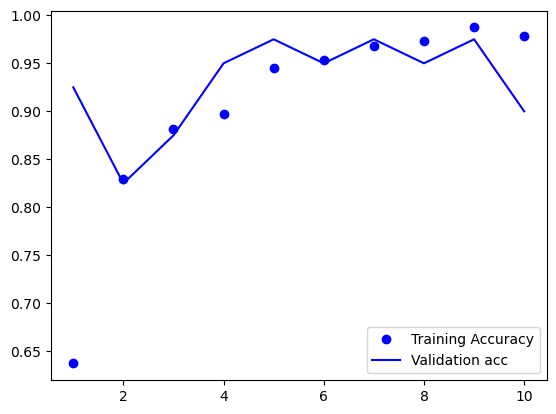

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.show()


##### Train and Validation loss plots

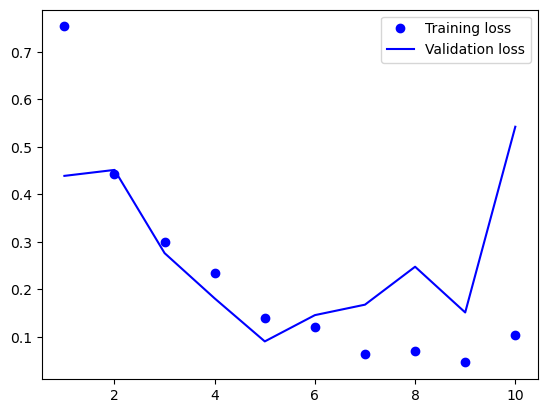

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

##### Save the model

In [11]:
model.save('bike_car_model.h5')